# HOMEWORK 4 - ARNO AMABILE
___

# Assignment 2 - Goodness of fit

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import random as rdn
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


### 1 - Test of Binomial against Normal

In [2]:
# Generate the distribution
N = 100
np.random.seed(1122)
dist_n = np.random.randn(N)

alpha = 0.1
if alpha == 0.01:
    threshold_ks = 1.63/sqrt(N) 
elif alpha == 0.05:
    threshold_ks = 1.36/sqrt(N)
elif alpha >0.05:
    print "Why such low standards? We need to be more ambitious!\n"
    alpha = 0.05
    threshold_ks = 1.36/sqrt(N)
else:
    print "Why such weird standards? We cannot afford originality!\n"
    alpha = 0.05
    threshold_ks = 1.36/sqrt(N)

print "AD Test of Normal distribution on Gaussian:", \
"\n - Critical values: ", scipy.stats.anderson(dist_n, dist='norm')[1], \
"\n - Significance levels:", scipy.stats.anderson(dist_n, dist='norm')[2]    
    
threshold_ad = np.asscalar(scipy.stats.anderson(dist_n, dist='norm')[1]
                           [scipy.stats.anderson(dist_n, dist='norm')[2]==[alpha*100]])
threshold_kl = -log(alpha)/N

print "\n Critical values: KS = {0:.3f}; AD = {1:.3f}; KL = {2:.3f} \n".format(threshold_ks, threshold_ad, threshold_kl)

Why such low standards? We need to be more ambitious!

AD Test of Normal distribution on Gaussian: 
 - Critical values:  [ 0.555  0.632  0.759  0.885  1.053] 
 - Significance levels: [ 15.   10.    5.    2.5   1. ]

 Critical values: KS = 0.136; AD = 0.759; KL = 0.030 



In [3]:
# Create array of parameters n for the binomial distributions
np.random.seed(2415)
narray = sorted(rdn.sample(xrange(0,100), 50))

# Create arrays of zero to fill with results
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

# Definition of the normal distribution function to be called in KS
def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

p=0.6 # Choice of p parameter, common to all binomial distributions

for i,n in enumerate(narray):
    # Generate the distribution
    np.random.seed(4315)
    dist_b = np.random.binomial(n, p, N)
 
    # Run the tests
    ks_b[i] = scipy.stats.kstest(dist_b, mynorm, args=(n*p, sqrt(n*p*(1.0-p))))[0]
    ad_b[i] = scipy.stats.anderson(dist_b, dist='norm')[0]
    
    # For KL, I need to simulate the normal distribution as well
    mybins=np.linspace(min(dist_b),max(dist_b), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_b [i] =  scipy.stats.entropy(np.histogram(dist_b, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters, loc=n*p, scale=sqrt(n*p*(1.0-p))))

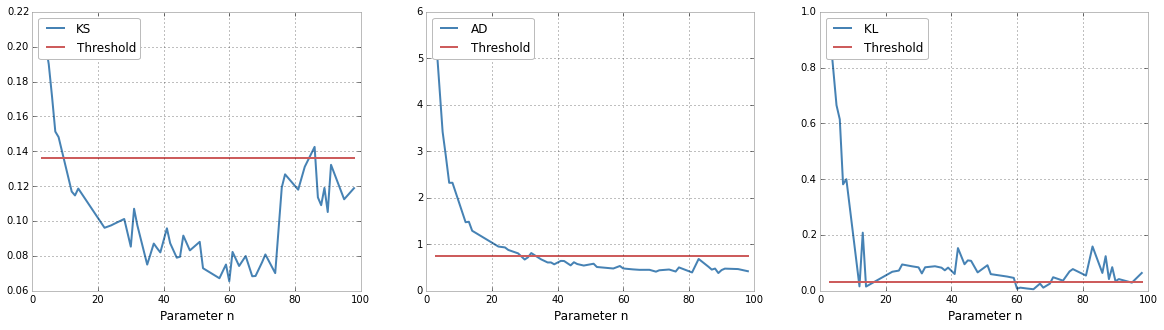

In [4]:
fig = pl.figure(figsize = (20,5))

fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.plot([narray[0], narray[-1]],[threshold_ks, threshold_ks], label="Threshold")
pl.xlabel("Parameter n")
pl.legend(loc=2)

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold_ad, threshold_ad], label="Threshold")
pl.xlabel("Parameter n")
pl.legend(loc=2)

fig.add_subplot(133)
pl.plot(narray, kl_b, label='KL ')
pl.plot([narray[0], narray[-1]],[threshold_kl, threshold_kl], label="Threshold")
pl.xlabel("Parameter n")
pl.legend(loc=2)

**KS, AD, and KL statistics with increases of n.** Tests of divergence between samples ($N=1000$) from binomial distribution (parameters $p=0.6$ and $n$) and $\mathcal{N}(\mu=$ np$,\sigma=\sqrt{np(1-p)})$. **Interpretation**: When np (here driven only by n) increases, the divergence with the normal decreases (Central Limit Theorem), hence the statistics decrease until they are under the thresholds (failure to reject $H_0$).

### 2 - Test of Poisson against Normal

In [5]:
# Create array of parameters n for the binomial distributions
np.random.seed(2415)
larray = sorted(rdn.sample(xrange(0,100), 50))

# Create arrays of zero to fill with results
ks_p = np.zeros(len(larray))
ad_p = np.zeros(len(larray))
kl_p = np.zeros(len(larray))

# Definition of the normal distribution function to be called in KS
def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

for i,lam in enumerate(larray):
    # Generate the distribution
    np.random.seed(2218)
    dist_p = np.random.poisson(lam, N)
 
    # Run the tests
    ks_p[i] = scipy.stats.kstest(dist_p, mynorm, args=(lam, sqrt(lam)))[0]
    ad_p[i] = scipy.stats.anderson(dist_p, dist='norm')[0]
    
    # For KL, I need to simulate the normal distribution as well
    mybins = np.linspace(min(dist_p),max(dist_p), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_p[i] = scipy.stats.entropy(np.histogram(dist_p, bins=mybins)[0],
                                  scipy.stats.norm.pdf(bincenters, loc=lam, scale=sqrt(lam)))

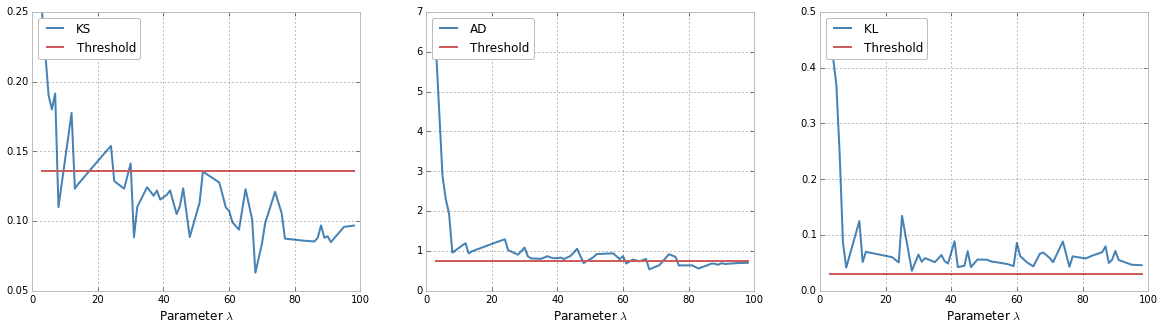

In [6]:
fig = pl.figure(figsize = (20,5))

fig.add_subplot(131)
pl.plot(narray, ks_p, label='KS')
pl.plot([narray[0], narray[-1]],[threshold_ks, threshold_ks], label="Threshold")
pl.xlabel(r'Parameter $\lambda$')
pl.legend(loc=2)

fig.add_subplot(132)
pl.plot(narray, ad_p,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold_ad, threshold_ad], label="Threshold")
pl.xlabel(r'Parameter $\lambda$')
pl.legend(loc=2)

fig.add_subplot(133)
pl.plot(narray, kl_p, label='KL ')
pl.plot([narray[0], narray[-1]],[threshold_kl, threshold_kl], label="Threshold")
pl.xlabel(r'Parameter $\lambda$')
pl.legend(loc=2)

**KS, AD, and KL statistics with increases of $\lambda$.** Tests of divergence between samples ($N=1000$) from Poisson distribution (parameter $\lambda$) and $\mathcal{N}(\mu=\lambda,\sigma= \sqrt{\lambda})$. **Interpretation**: When $\lambda$ increases, the divergence with the normal decreases (Central Limit Theorem), hence the statistics decrease until they are under the thresholds (failure to reject $H_0$).

### 3 - Kullback-Leibler Divergence

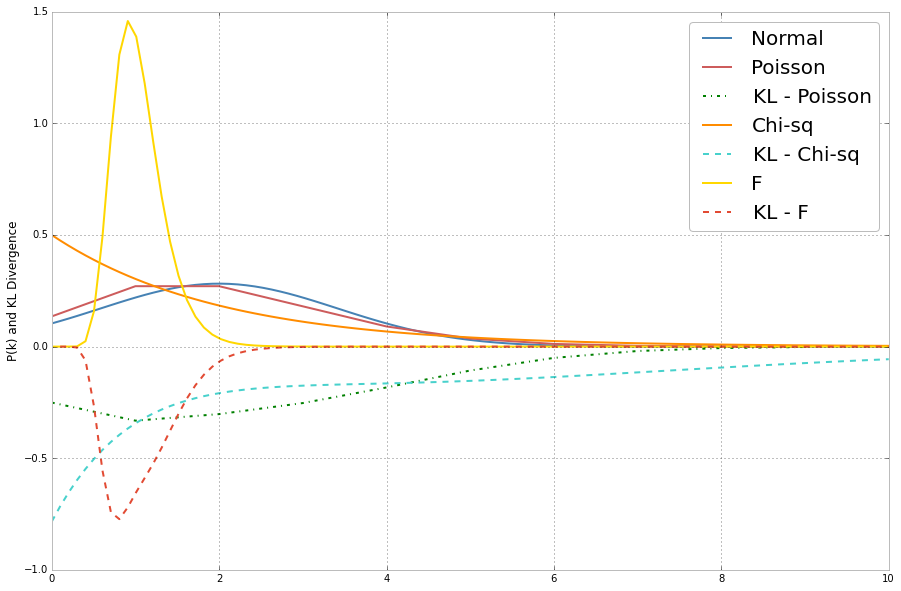

In [7]:
p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
n = lambda x, mu, s : scipy.stats.distributions.norm.pdf(x,mu,s)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,50,50)

Dkl = lambda x ,mu, s, p :  p(x, mu)*np.log10(n(x, mu, s)) + p(x, mu)*np.log10(p(x, mu))

# Choosing parameters: the Poisson distribution needs another support x_p, as it requires integers
mu = 2
x=np.linspace(0,10,100)
x_p=np.arange(0,10,1)

pl.figure(figsize=(15,10))

pl.plot(x, n(x,mu,sqrt(mu)), label='Normal')
pl.plot(x_p, p(x_p,mu), label='Poisson')
pl.plot(x_p, Dkl(x_p, mu, sqrt(mu), p), '-.', label = 'KL - Poisson')

pl.plot(x, c(x,mu), label='Chi-sq')
pl.plot(x,Dkl(x, mu, 1, c), '--', label = 'KL - Chi-sq')

pl.plot(x, f(x,mu), label='F')
pl.plot(x,Dkl(x, mu, 1, f), '--', label = 'KL - F')

pl.xlim(0,10)
pl.ylabel("P(k) and KL Divergence")
pl.legend( fontsize = 20)

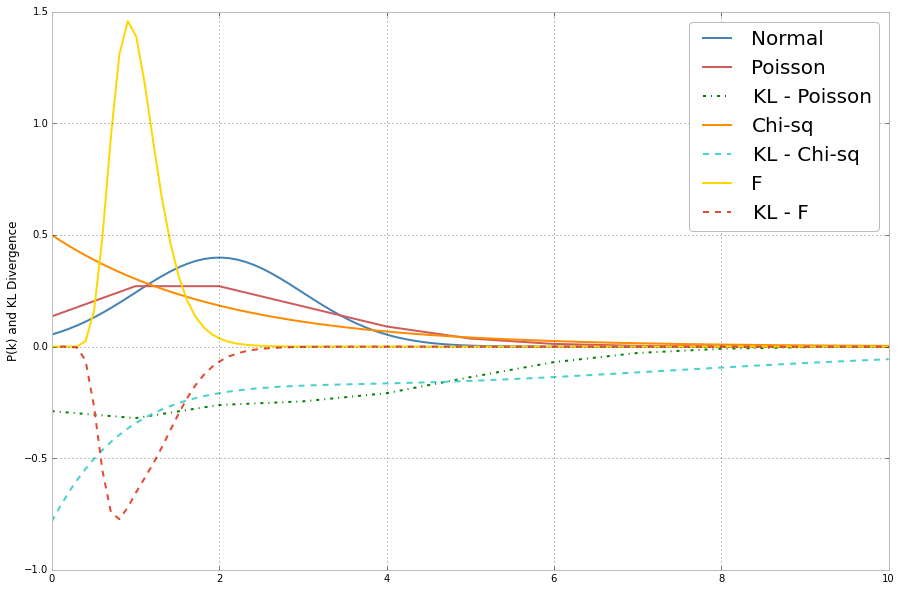

In [8]:
p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
n = lambda x, mu : scipy.stats.distributions.norm.pdf(x,mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,50,50)

Dkl = lambda x ,mu, p :  p(x, mu)*np.log10(n(x, mu)) + p(x, mu)*np.log10(p(x, mu))

# Choosing parameters: the Poisson distribution needs another support x_p, as it requires integers
mu = 2
x=np.linspace(0,10,100)
x_p=np.arange(0,10,1)

pl.figure(figsize=(15,10))

pl.plot(x, n(x,mu), label='Normal')
pl.plot(x_p, p(x_p,mu), label='Poisson')
pl.plot(x_p, Dkl(x_p, mu, p), '-.', label = 'KL - Poisson')

pl.plot(x, c(x,mu), label='Chi-sq')
pl.plot(x,Dkl(x, mu, c), '--', label = 'KL - Chi-sq')

pl.plot(x, f(x,mu), label='F')
pl.plot(x,Dkl(x, mu, f), '--', label = 'KL - F')

pl.xlim(0,10)
pl.ylabel("P(k) and KL Divergence")
pl.legend( fontsize = 20)

**Kullback-Leibler Divergence statistic for several distributions.** The Divergence is a measure of the "distance" between a point in the distribution and the corresponding point from the Normal distribution with same mean and same variance.